In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [3]:
import xml.etree.ElementTree as ET
import os
import matplotlib.patches as patches
import torch
from torchvision import ops
import torch.nn.functional as F
import math

In [4]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [5]:
from utils import *

In [6]:
from dataset import *

In [7]:
annotation_dir = "VOC2007/Annotations"
train_dir = "VOC2007/ImageSets/Layout/trainval.txt"
jpg_dir = "VOC2007/JPEGImages"

In [164]:
tree = ET.parse(annotation_dir+"/000005.xml")
root = tree.getroot()
all_object = root[6:]

In [150]:
for object in all_object:
        bndbox = object.find("bndbox")
        print(bndbox[0].text)

263
165
5
241
277


In [8]:
dataset = VOCDataset(annotation_dir, train_dir, jpg_dir)

In [9]:
dataset.gt_classes_all[0]

['chair', 'chair', 'chair', 'chair', 'chair']

In [10]:
dataset.scale_resize

[[0.896, 1.1946666666666668],
 [0.896, 1.3453453453453454],
 [0.896, 1.3453453453453454],
 [1.341317365269461, 0.896],
 [0.896, 1.1946666666666668],
 [1.1946666666666668, 0.896],
 [1.3333333333333333, 0.896],
 [0.896, 1.337313432835821],
 [0.896, 1.3453453453453454],
 [1.2444444444444445, 0.896],
 [1.3493975903614457, 0.896],
 [0.896, 1.3453453453453454],
 [1.3493975903614457, 0.896],
 [0.896, 1.3453453453453454],
 [0.896, 1.3453453453453454],
 [0.896, 1.341317365269461],
 [0.9032258064516129, 0.896],
 [0.896, 1.337313432835821],
 [1.3453453453453454, 0.896],
 [0.896, 1.3453453453453454],
 [0.896, 1.0692124105011933],
 [0.896, 1.1946666666666668],
 [0.896, 1.3215339233038348],
 [0.896, 1.3869969040247678],
 [0.896, 1.1946666666666668],
 [0.896, 1.1946666666666668],
 [0.896, 1.1946666666666668],
 [0.896, 1.763779527559055],
 [1.3453453453453454, 0.896],
 [0.896, 1.3453453453453454],
 [0.896, 1.1946666666666668],
 [0.896, 1.12],
 [0.9431578947368421, 0.9333333333333333],
 [0.896, 1.19466

In [11]:
dataset.name2idx

{'chair': 0,
 'train': 1,
 'bird': 2,
 'car': 3,
 'motorbike': 4,
 'cat': 5,
 'boat': 6,
 'sheep': 7,
 'tvmonitor': 8,
 'dog': 9,
 'cow': 10,
 'bicycle': 11,
 'horse': 12,
 'person': 13,
 'pottedplant': 14,
 'bus': 15,
 'diningtable': 16,
 'aeroplane': 17,
 'bottle': 18,
 'sofa': 19}

In [12]:
img, label_matrix = dataset.__getitem__(0)

tensor([[263., 211., 324., 339.],
        [165., 264., 253., 372.],
        [  5., 244.,  67., 374.],
        [241., 194., 295., 299.],
        [277., 186., 312., 220.]])


In [13]:
gt_boxes = dataset.gt_boxes_all[0]
gt_boxes

tensor([[263., 211., 324., 339.],
        [165., 264., 253., 372.],
        [  5., 244.,  67., 374.],
        [241., 194., 295., 299.],
        [277., 186., 312., 220.]])

In [14]:
for i in range(7):
    for j in range(7):
        for v in label_matrix[i][j]:
            if v == 1:
                print(i,j)
                print(label_matrix[i][j])
                break

3 4
tensor([1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 1.0000, 0.1230, 0.7893, 0.4900, 0.6347])
4 3
tensor([1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 1.0000, 0.7520, 0.6013, 0.7560, 1.9600])
5 0
tensor([1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 1.0000, 0.5040, 0.7680, 0.8680, 2.4267])
5 2
tensor([1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 1.0000, 0.9260, 0.9360, 1.2320, 2.0160])
5 4
tensor([1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,


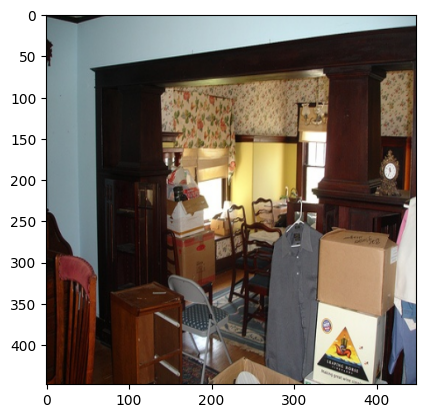

In [132]:
plt.imshow(img)

In [48]:
imgs_dir, gt_class_all, gt_boxes_all = parse_annotation(annotation_dir, train_dir, jpg_dir)

In [182]:
img = cv2.imread(imgs_dir[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape
# resize img
# img = cv2.resize(img, (448, 448))

(375, 500, 3)

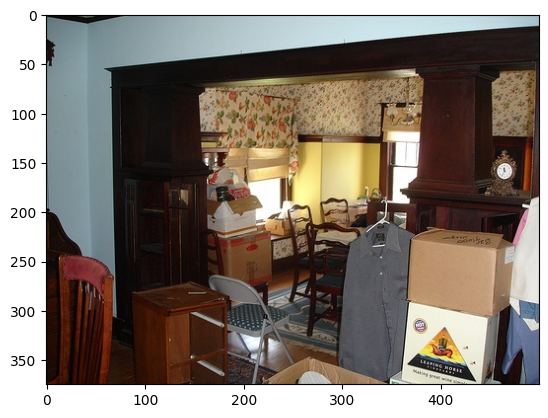

In [183]:
plt.imshow(img)

In [75]:
max(2,7,4,6,1234,54,2346,134,5243)

5243

In [83]:
scale, sc = 1,1
scale

1

In [80]:
a = [1,2,2,3,4,4]
b = torch.tensor(a)
F.one_hot(b, num_classes=5)

tensor([[0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1]])

In [50]:
len(imgs_dir)

646

In [21]:
gt_class_all = []
gt_boxes_all = []
for img_file in train_data:
    img_file += '.xml'
    xml_file_path = os.path.join("VOC2007/Annotations", img_file)
    tree = ET.parse(xml_file_path)
    root = tree.getroot()
    all_object = root[7:] + root[-1:]
    for object in all_object:
        print(object[0].text)
    break

car
